# Counting bikes in Zurich

This notebook counts weekly bike riders who pass a certain bike counter.

In [1]:
import os
import requests

import matplotlib.pyplot as plt
import pandas as pd

Parameters of this notebook. Which year and which location should we produe plots for?

In [2]:
year = 2015
location = "ECO09113499"

Download the data if it isn't present already.

In [3]:
BASE = "https://data.stadt-zuerich.ch/dataset/verkehrszaehlungen_werte_fussgaenger_velo/resource/"
URLS = {
    2015: BASE + "5c994056-eda6-48c5-8e61-28e96bcd04a3/download/2015verkehrszaehlungenwertefussgaengervelo.csv",
    2014: BASE + "bd2c9dd9-5b05-4303-a4c9-4a9f5b73e8f7/download/2014verkehrszaehlungenwertefussgaengervelo.csv",
    2016: BASE + "ed354dde-c0f9-43b3-b05b-08c5f4c3f65a/download/2016_verkehrszaehlungen_werte_fussgaenger_velo.csv"
    }

if year not in URLS:
    raise ValueError("Year has to be one of 2014, 2015 "
                     "not %s." % year)

fname = "bikes-%i.csv" % year
if not os.path.exists(fname):
    with requests.get(URLS[year], stream=True) as r:
        r.raise_for_status()
        with open(fname, 'wb') as w:
            for chunk in r.iter_content(chunk_size=65535):
                w.write(chunk)

Sanity check that the first few lines look alright.

In [4]:
!head $fname

Load the data int oa dataframe. The index column is called "Datum".

In [5]:
data = pd.read_csv(fname, parse_dates=True, dayfirst=True, index_col='Datum')

# filter by location
data = data[data.Standort == location]

# subselect only the Velo data
data = data[["Velo_in", "Velo_out"]]

data['Total'] = data.Velo_in + data.Velo_out

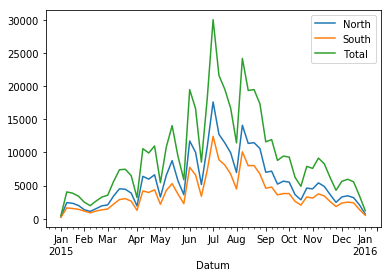

In [6]:
# rename for easier plotting
data.columns = ["North", "South", "Total"]

# Compute weekly rides by summing over the 15m intervals
weekly = data.resample('W').sum()
weekly.plot()

plt.savefig("weekly-%s.png" % year)